[*********************100%%**********************]  1 of 1 completed


Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


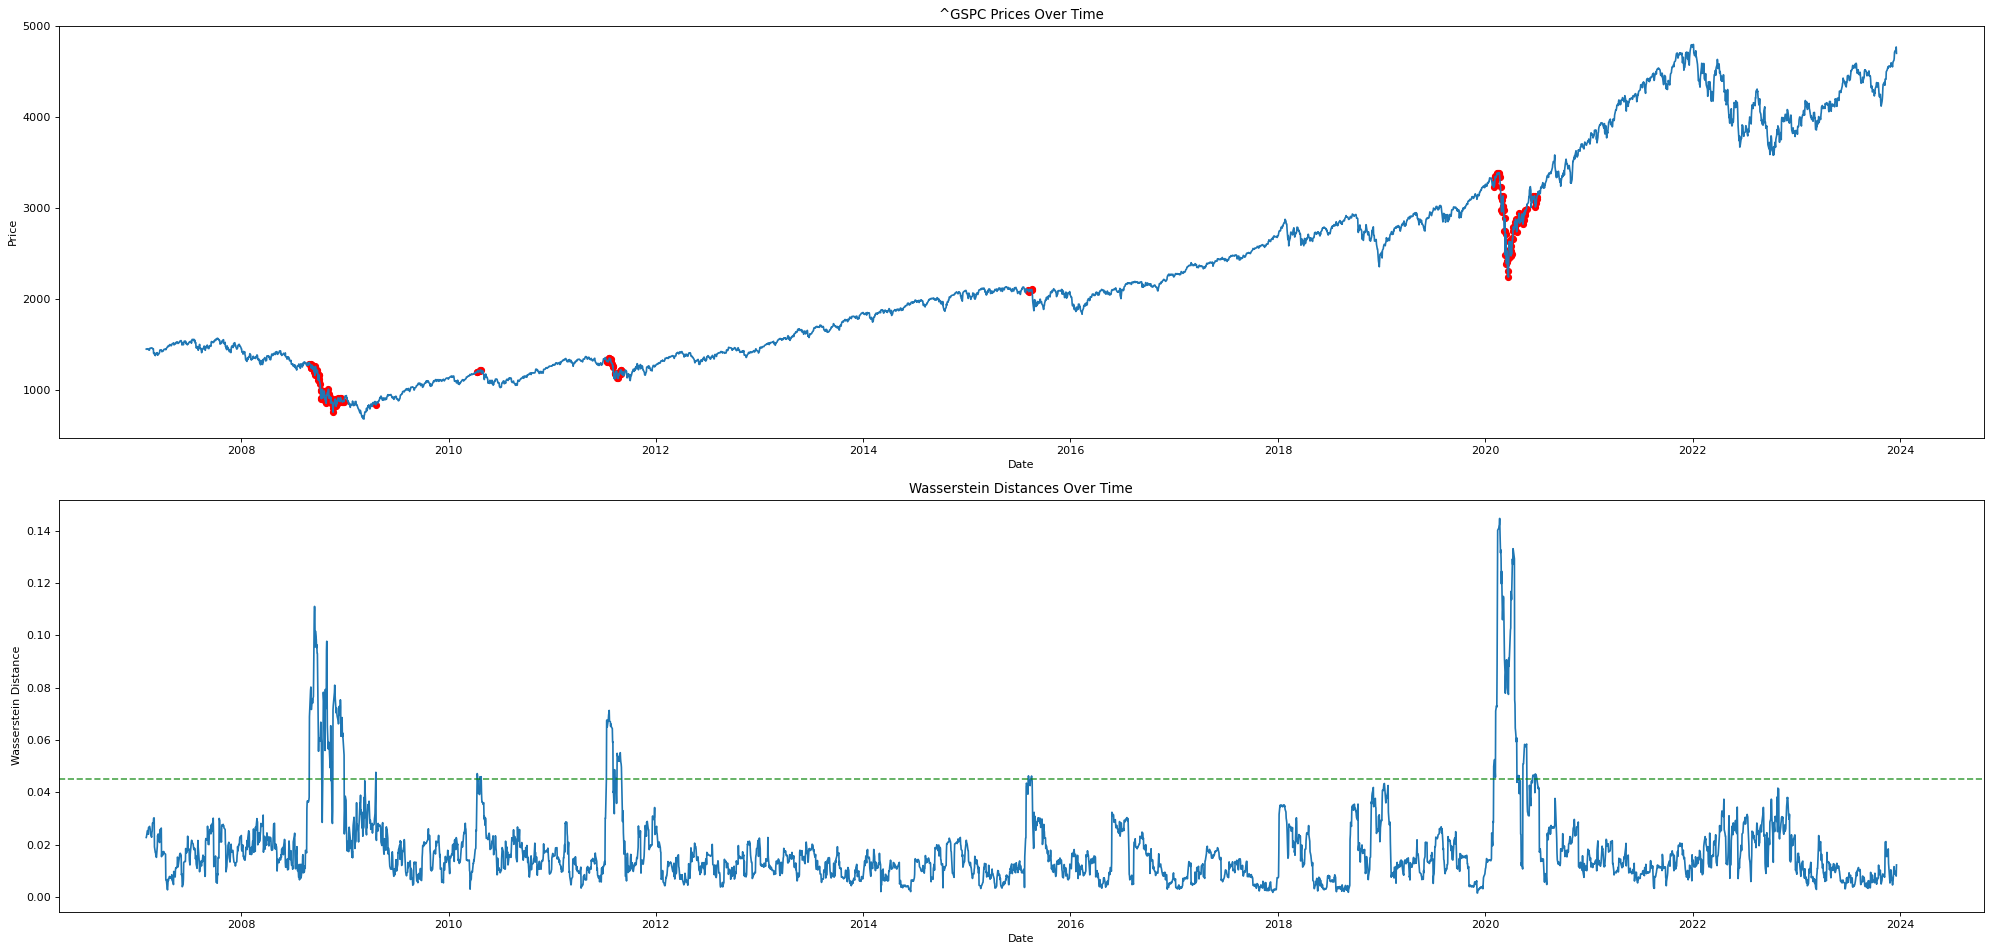

In [15]:
#Earth Mover's Distance 
import yfinance as yf  # Importing yfinance library to fetch financial data
import numpy as np  # Importing NumPy library for numerical computations
from ripser import Rips  # Importing Rips class from ripser for topological analysis
import persim  # Importing persim library for computing persistent diagrams
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import warnings  # Importing warnings module to handle warnings

def fetch_data(ticker_name, start_date, end_date):
    """Fetch stock data from Yahoo Finance."""
    raw_data = yf.download(ticker_name, start=start_date, end=end_date)  # Fetching stock data
    adjusted_close = raw_data['Adj Close'].dropna()  # Extracting adjusted close prices
    prices = adjusted_close.values  # Storing adjusted close prices in an array
    log_returns = np.log(prices[1:] / prices[:-1])  # Calculating log returns
    return adjusted_close, log_returns  # Returning adjusted close prices and log returns

def compute_wasserstein_distances(log_returns, window_size, rips):
    """Compute the Wasserstein distances."""
    n = len(log_returns) - (2 * window_size) + 1  # Determining the number of iterations
    distances = np.full((n, 1), np.nan)  # Initializing array for distances with NaN values
    print(distances)
    for i in range(n):
        segment1 = log_returns[i:i+window_size].reshape(-1, 1)  # Extracting log return segments
        segment2 = log_returns[i+window_size:i+(2*window_size)].reshape(-1, 1)  # Extracting another segment
        if segment1.shape[0] != window_size or segment2.shape[0] != window_size:  # Checking segment sizes
            continue
        dgm1 = rips.fit_transform(segment1)  # Computing persistence diagram for segment1
        dgm2 = rips.fit_transform(segment2)  # Computing persistence diagram for segment2
        distance = persim.wasserstein(dgm1[0], dgm2[0], matching=False)  # Calculating Wasserstein distance
        distances[i] = distance  # Storing computed distance
    return distances  # Returning computed distances

def plot_data(prices, distances, threshold, window_size):
    """Generate the plots."""
    dates = prices.index[window_size:-window_size]  # Extracting dates for plotting
    valid_indices = ~np.isnan(distances)  # Finding valid indices without NaN values
    valid_dates = dates[valid_indices.flatten()]  # Extracting valid dates
    valid_distances = distances[valid_indices]  # Extracting valid distances
    alert_indices = [i for i, d in enumerate(valid_distances) if d > threshold]  # Finding indices above threshold
    alert_dates = [valid_dates[i] for i in alert_indices]  # Extracting dates above threshold
    alert_values = [prices.iloc[i + window_size] for i in alert_indices]  # Extracting prices above threshold
    fig, ax = plt.subplots(2, 1, figsize=(25, 12), dpi=80)  # Creating subplots for visualization
    ax[0].plot(valid_dates, prices.iloc[window_size:-window_size], label=ticker_name)  # Plotting prices over time
    ax[0].scatter(alert_dates, alert_values, color='r', s=30)  # Highlighting alerts in the plot
    ax[0].set_title(f'{ticker_name} Prices Over Time')  # Setting title for the price plot
    ax[0].set_ylabel('Price')  # Setting y-label for the price plot
    ax[0].set_xlabel('Date')  # Setting x-label for the price plot
    ax[1].plot(valid_dates, valid_distances)  # Plotting Wasserstein distances over time
    ax[1].set_title('Wasserstein Distances Over Time')  # Setting title for the distance plot
    ax[1].set_ylabel('Wasserstein Distance')  # Setting y-label for the distance plot
    ax[1].axhline(threshold, color='g', linestyle='--', alpha=0.7)  # Adding threshold line to the plot
    ax[1].set_xlabel('Date')  # Setting x-label for the distance plot
    plt.tight_layout()  # Adjusting subplot layout
    plt.show()  # Displaying the plot

# Configuration
ticker_name = '^GSPC'  # Setting stock ticker symbol (S&P 500)
start_date_string = "2007-01-01"  # Setting start date for data retrieval
end_date_string = "2024-04-21"  # Setting end date for data retrieval
window_size = 20  # Setting window size for analysis
threshold = 0.045  # Setting threshold for alert
warnings.filterwarnings('ignore')  # Ignoring warnings for a cleaner output

# Fetching data and performing analysis
prices, log_returns = fetch_data(ticker_name, start_date_string, end_date_string)  # Fetching financial data
rips = Rips(maxdim=2)  # Initializing Rips object for topological analysis
wasserstein_dists = compute_wasserstein_distances(log_returns, window_size, rips)  # Calculating Wasserstein distances
plot_data(prices, wasserstein_dists, threshold, window_size)  # Generating and displaying plots

In [ ]:
# wasserstein Distance BP

import persim
from ripser import Rips
import numpy as np 
import yfinance as yf 
import matplotlib.pyplot as plt 
import warnings


raw_data = yf.download("^GSPC", start = "2007-01-01" , end = "2024-04-30") #downloading yf data
raw_data["LogR"] = np.log(raw_data["Adj Close"].dropna()/raw_data["Adj Close"].dropna().shift(1)) #calculating log return

n = len(raw_data["LogR"]) - (2 * 20) + 1 # we calculate the length of array LogR and we substract 2 * windows size, the windows for analysis and *2 because we analyse 2 semgents so there is not Just window size Len/Window size
distances = np









In [1]:
import numpy as np 
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

data = yf.download("^GSPC", start = "1990-01-01", end = "2024-04-01")
data["LogR"] = (np.log(data["Adj Close"]/data["Adj Close"].shift(1)))

data_clean = data.dropna(subset=["LogR"])
Pdata = pd.DataFrame(data_clean)
# Pdata.index = pd.DatetimeIndex(data_clean.index)

dftest = adfuller(Pdata["LogR"])
# print(dftest)
adf = dftest[0]
pvalue = dftest[1]
critical_value = dftest[4]['5%']
print("stationnarity ok " if (pvalue < 0.05) and (adf < critical_value) else "stationnarity not ok")

# plt.figure(figsize=(20,6))
# plt.plot(Pdata["LogR"],linewidth=0.5)
# plt.show()

stepwise_fit = pm.auto_arima(Pdata["LogR"], start_p =1, start_q= 1, max_p= 5, max_q= 5, n=12, start_P=0, seasonal= True, d=1, D= 1, trace= True, error_action='ignore', suppress_warnings=True, stepwise= True )

p,d,q = 3,1,2


[*********************100%%**********************]  1 of 1 completed


stationnarity ok 
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=12.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-45724.333, Time=2.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-48602.252, Time=0.82 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=9.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-45726.333, Time=0.65 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-49757.037, Time=4.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-50298.580, Time=9.14 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-50646.596, Time=11.82 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-50854.420, Time=2.16 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-51510.873, Time=25.93 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-51808.408, Time=24.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-51804.531, Time=17.53 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-51880.181, Time=21.43 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-52181.478, Time=18.8

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import pmdarima as pm
import matplotlib.dates as mdates

# Download historical data for Amazon
ticker = 'AMZN'
start_date = '2008-01-01'
end_date = '2023-01-01'
amzn_data = yf.download(ticker, start=start_date, end=end_date)

# Extract closing prices
amazon_close = amzn_data['Adj Close'].resample('M').last()

# # Analyze the time series
# plot_acf(amazon_close, lags=50, zero=False)
# plt.title('Autocorrelation Function (ACF)')
# plt.show()

# plot_pacf(amazon_close, lags=50, zero=False)
# plt.title('Partial Autocorrelation Function (PACF)')
# plt.show()

# # Make the time series stationary through differencing
amazon_diff = amazon_close.diff().dropna()

# # Display the differenced time series
# amazon_diff.plot(figsize=(12, 6))
# plt.title('Differenced Amazon Stock Prices')
# plt.show()

# Fit stepwise auto-ARIMA using the differenced series
stepwise_fit = pm.auto_arima(amazon_diff, start_p=1, start_q=1,
                                        max_p=3, max_q=3, m=12,
                                        start_P=0, seasonal=True,
                                        d=1, D=1, trace=True,
                                        error_action='ignore',  
                                        suppress_warnings=True,  
                                        stepwise=True)

# Print the summary of the stepwise_fit
print(stepwise_fit.summary())

# Train the ARIMA model
p, d, q = 3, 1, 0
P, D, Q, s = 2, 1, 0, 200
model = SARIMAX(amazon_close, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Print model summary
# print(results.summary())

import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset

# Make predictions with the trained model
forecast_steps = 300
forecast_index = pd.date_range(start=amazon_close.index[-1], periods=forecast_steps + 1, freq='B')[1:]
forecast = results.get_forecast(steps=forecast_steps, index=forecast_index)
forecast_mean = forecast.predicted_mean

# Visualize the forecasts
plt.figure(figsize=(12, 6))
plt.plot(amazon_close.index, amazon_close, label='Actual Prices')
plt.plot(forecast_index, forecast_mean, color='red', label='Forecast')
plt.title('Amazon Stock Price Forecast')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Chaque mois

# Vous pouvez également ajouter une rotation aux étiquettes pour une meilleure lisibilité
plt.setp(plt.gca().get_xticklabels(), rotation=90, ha='right')

# Ne pas oublier d'appeler tight_layout() pour ajuster automatiquement les tailles et les espacements
plt.tight_layout()

plt.show()


ModuleNotFoundError: No module named 'pandas'

In [ ]:
# API NASDAQDATALINK

import nasdaqdatalink

# key ="_ne9sRNjzTN7kK1oyMc_"

# data = nasdaqdatalink.get("WIKI/AAPL", ticker='AAPL', start_date="2006-10-01", end_date="2012-01-01")
# data2 = nasdaqdatalink.get_table('ZACKS/FC', ticker='AAPL')
# mydata = nasdaqdatalink.get("WIKI/AAPL", start_date="2012-10-01", end_date="2024-01-01")
# aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2024-01-01")
# aapl2 = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES',date='2017-10-31,2017-10-30,2017-10-27', ticker='AAPL',api_key=key)


nasdaqdatalink.ApiConfig.api_key = "_ne9sRNjzTN7kK1oyMc_"
aapl2 = nasdaqdatalink.get_table('QUOTEMEDIA/PRICES',date='2017-10-31,2017-10-30,2017-10-27', ticker='AAPL')
#print(data)
print(aapl2)

MICP.PA        HIGH    CLOSE      LOW     OPEN  COUNT   VOLUME      logr
Date                                                                    
2016-01-04    21.75  21.3975  21.2575    21.75   5076  1822252      <NA>
2016-01-05  21.6725    21.24  21.1075  21.6675   6772  2366824 -0.007388
2016-01-06   21.175    20.67    20.53  21.1375   6739  2360704 -0.027203
2016-01-07   20.535    20.41    20.07  20.1975  10901  3494104 -0.012658
2016-01-08  20.8575    20.36    20.34  20.4325   7712  2476568 -0.002453


In [ ]:
# API Eikon
import eikon as ek
import pandas as pd
import numpy as np
ek.set_app_key('042ba2f0a7984e0984af065268b5d33a727753ba')

# ABC = ek.get_timeseries(["MSFT.O"], start_date="2016-01-01", end_date="2016-01-10")
ABC = ek.get_timeseries(["MICP.PA"], start_date="2016-01-01", end_date="2016-01-10")
ABC["logr"] = np.log(ABC["CLOSE"]/ABC["CLOSE"].shift(1))
# pd.DataFrame.describe(ABC)
print(ABC)


MICP.PA        HIGH    CLOSE      LOW     OPEN  COUNT   VOLUME      logr
Date                                                                    
2016-01-04    21.75  21.3975  21.2575    21.75   5076  1822252      <NA>
2016-01-05  21.6725    21.24  21.1075  21.6675   6772  2366824 -0.007388
2016-01-06   21.175    20.67    20.53  21.1375   6739  2360704 -0.027203
2016-01-07   20.535    20.41    20.07  20.1975  10901  3494104 -0.012658
2016-01-08  20.8575    20.36    20.34  20.4325   7712  2476568 -0.002453


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import eikon as ek

# pd.read_excel("GICSSECTOR.xlsx", sheet_name = 1) # Database for GICS Sectors
# pd.read_excel("Companydatabase.xlsx", ) # Database fore all companies repertoried 
# pd.read_excel("Companydatabase.xlsx", ) # the list that will provide the ref for the companies that we will analyse


ek.set_app_key('042ba2f0a7984e0984af065268b5d33a727753ba') #API clé


# DATA, err = ek.get_data("0#.PX1NR","TR.RIC")

DATA,err= ek.get_data("0#.PX1NR",["TR.GICSSector","TR.RIC"])
DATA.set_index(DATA.columns[0],inplace=True)



def Dico(DATA):
    sectors_list  = list(set(DATA["GICS Sector Name"])) # supprimer les doublons d'une liste // Liste des secteurs pour les cases à cocher
    Stock_sector = {}
    for index,row in DATA.iterrows():
        sector = row["GICS Sector Name"]
        CompanyRIC = row["RIC"]

        if sector not in Stock_sector:
            Stock_sector[sector] = []
        if CompanyRIC not in Stock_sector[sector]:
            Stock_sector[sector].append(CompanyRIC)
    ABC = ek.get_timeseries(Stock_sector["Financials"], fields="Close", start_date="2016-01-01", end_date="2016-01-10")
    return ABC

XYZ = Dico(DATA)

# Trifait = pd.DataFrame(Dico(DATA)["Consumer Discretionary"])
# # list_of_RICs = Dico(DATA)["Consumer Discretionary"]

# # ABC = ek.get_timeseries(list_of_RICs, fields="Close", start_date="2016-01-01", end_date="2016-01-10")
    

In [ ]:
import tkinter as tk
from tkinter import ttk

sectors_list  = list(set(["Consumer","Pet"])) # supprimer les doublons d'une liste // Liste des secteurs pour les cases à cocher

import tkinter as tk
from tkinter import ttk

def create_sector_selection_window(sectors_list):
    def get_selected_sectors():
        selected_sectors = [sector for sector, var in sectors_vars.items() if var.get()]
        print("Secteurs sélectionnés :", selected_sectors)
        # Vous pouvez maintenant passer `selected_sectors` à votre fonction `Dico`
        # Par exemple : Dico(DATA, selected_sectors)

    def create_checkboxes(root, sectors):
        for sector in sectors:
            var = tk.BooleanVar(value=False)
            check = ttk.Checkbutton(root, text=sector, variable=var)
            check.pack(anchor='w')
            sectors_vars[sector] = var
            
    sectors_vars = {} # Dictionnaire pour stocker les variables associées aux cases à cocher
    root = tk.Tk()# Créer la fenêtre principale
    root.title("Sélection des secteurs")# Créer la fenêtre principale
    create_checkboxes(root, sectors_list)# Créer les cases à cocher
    submit_button = ttk.Button(root, text="Soumettre", command=get_selected_sectors)# Bouton pour soumettre la sélection
    submit_button.pack()# Bouton pour soumettre la sélection
    root.mainloop()# Lancer l'interface graphique


# Appeler la fonction pour créer et afficher la fenêtre de sélection
create_sector_selection_window(sectors_list)



AttributeError: module 'tkinter.ttk' has no attribute 'BooleanVar'

In [18]:
%reset -f